In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install latools

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.0/446.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/BrownPD Shared Folder/LA-ICP-MS/LA-ICP-MS reduction

[Errno 2] No such file or directory: '/content/drive/MyDrive/BrownPD Shared Folder/LA-ICP-MS/LA-ICP-MS reduction'
/content


In [ ]:
# Import tools
%matplotlib inline


import pandas as pd
import latools as la
import numpy as np

ModuleNotFoundError: No module named 'latools'

In [ ]:
from latools.helpers.io import read_dataformat

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
path = '/content/drive/MyDrive/BrownPD Shared Folder/LA-ICP-MS/LA-ICP-MS reduction/LA-ICP-MS annotatioinn/April_2023_runs/Track1'
dat = la.analyse(path,
                 config    = 'REPRODUCE',
                 internal_standard = 'Ca43',
                 #srm_file='/usr/local/lib/python3.7/dist-packages/latools/resources/SRM_GeoRem_Preferred_170622.csv',
                 srm_identifier='STD' )
#dat.trace_plots()

--------------------------------------------------------------------------------
Starting analysis:
  Using REPRODUCE configuration.


0it [00:00, ?it/s]

Loading Data:   0%|          | 0/7 [00:00<?, ?it/s]

Loading Data:
  7 Data Files Loaded: 6 standards, 1 samples
Analytes: Li6 Na23 Mg24 Mg25 Al27 Si29 P31 K39 Ca43 Ca44 Fe54 Mn55 Fe57 Co59
Ni60 Cu63 Zn64 Cu65 Zn66 Sr88 Ba137 Ba138 Pb208 Th232 U238
  Internal Standard: Ca43


AutoRange:   0%|          | 0/7 [00:00<?, ?it/s]

Drawing Plots:   0%|          | 0/7 [00:00<?, ?it/s]

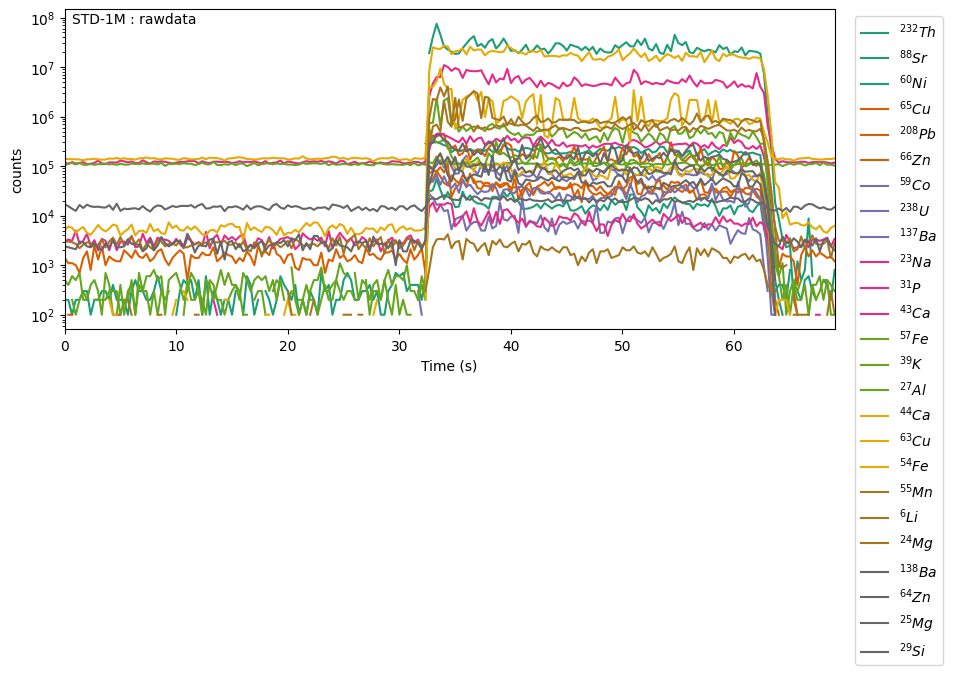

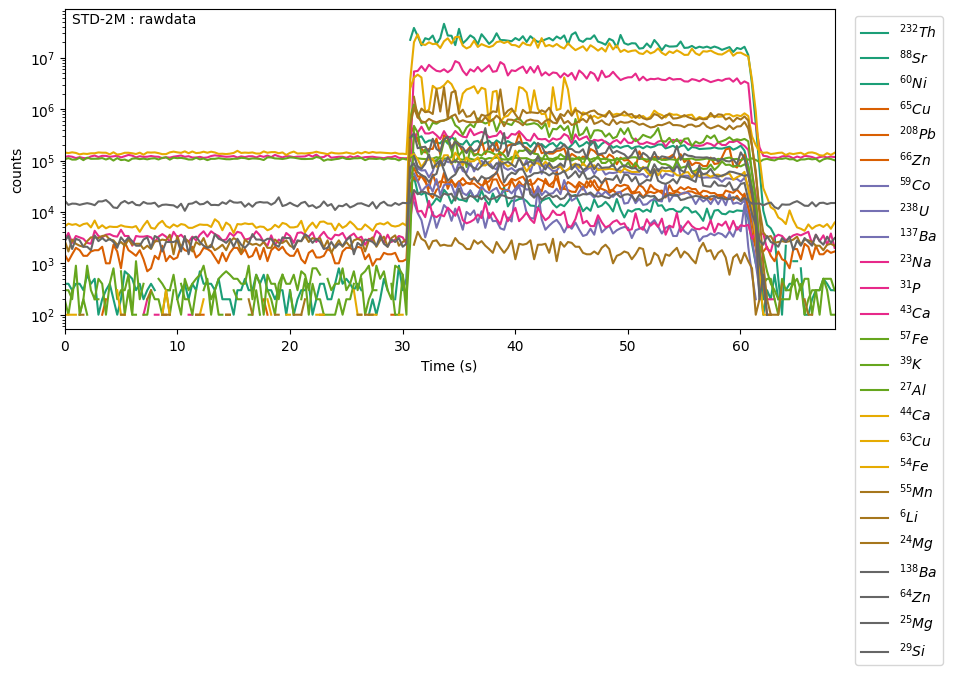

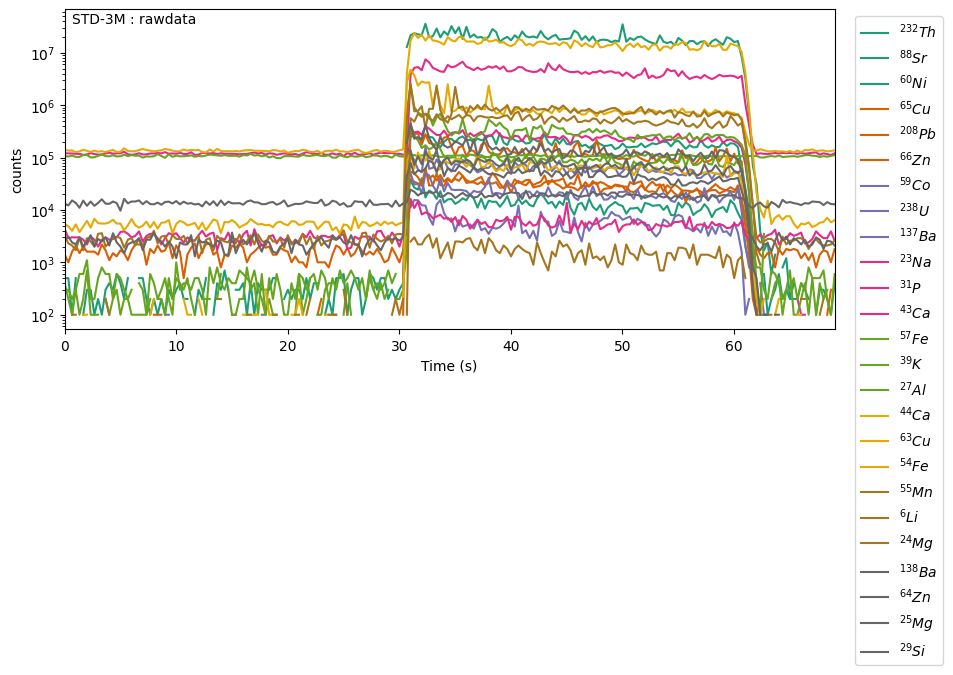

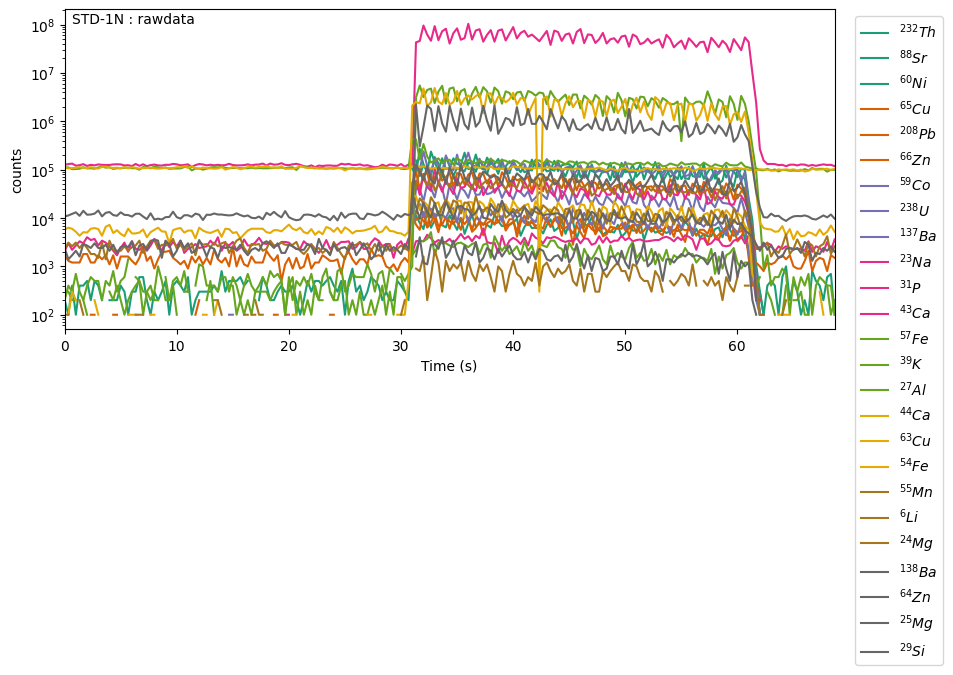

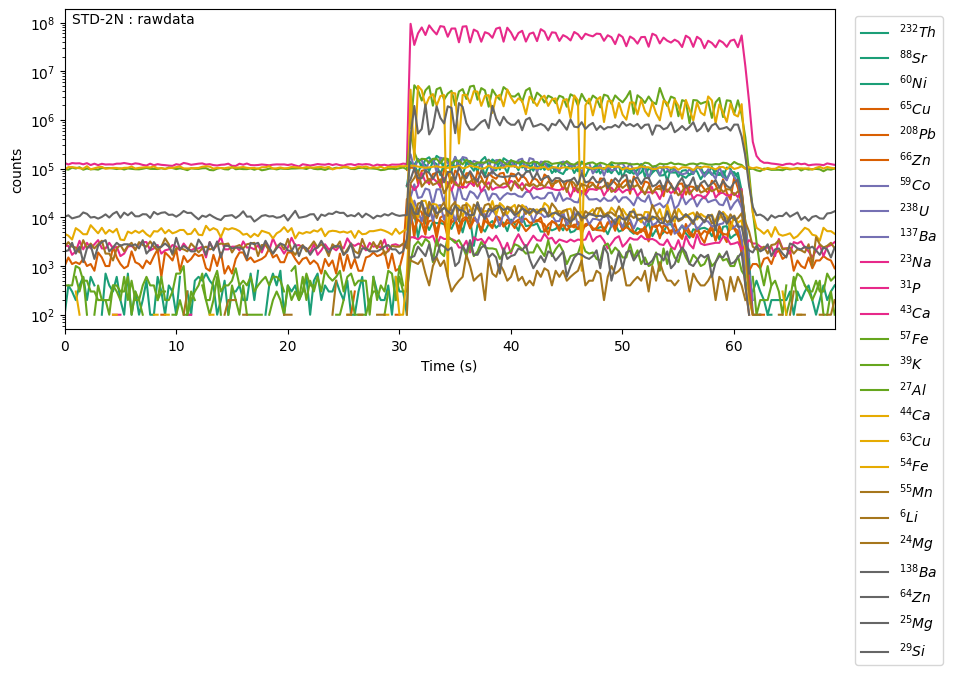

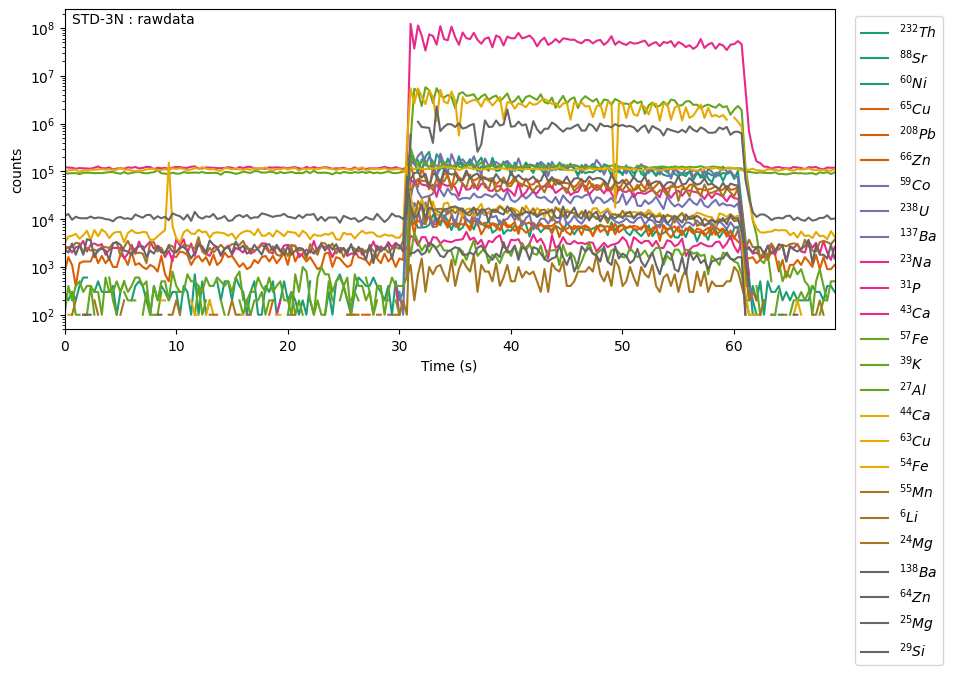

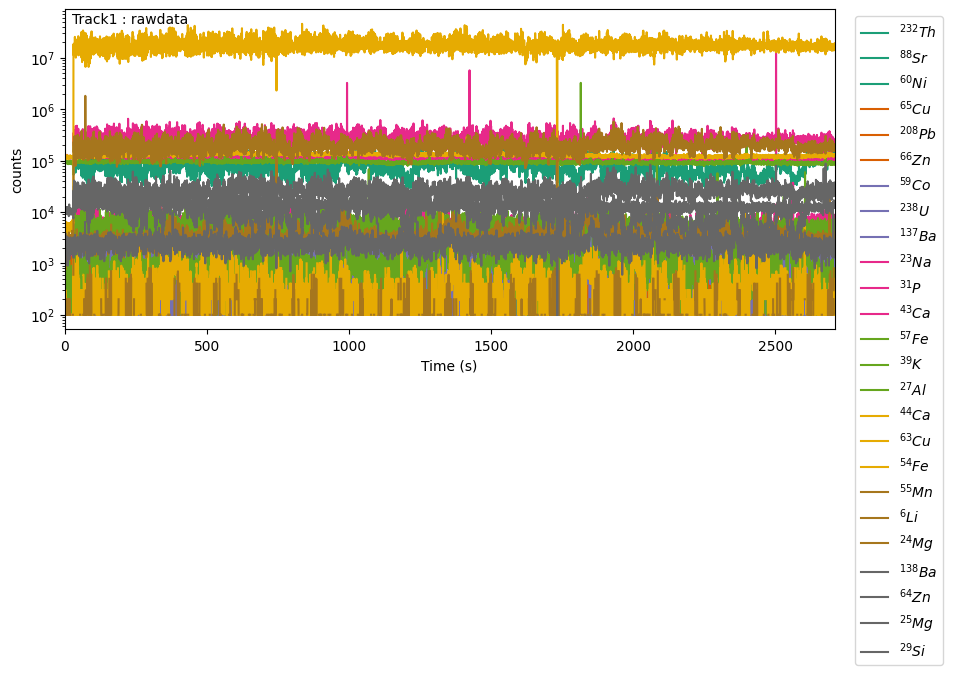

In [ ]:
dat.autorange()
dat.trace_plots()

Calculating Analyte Backgrounds:   0%|          | 0/25 [00:00<?, ?it/s]

Plotting backgrounds:   0%|          | 0/25 [00:00<?, ?it/s]

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Points = raw data; Bars = stderr; Lines = Calculated Background; Envelope = Background stderr'}, xlabel='Time (s)', ylabel='Background Counts'>)

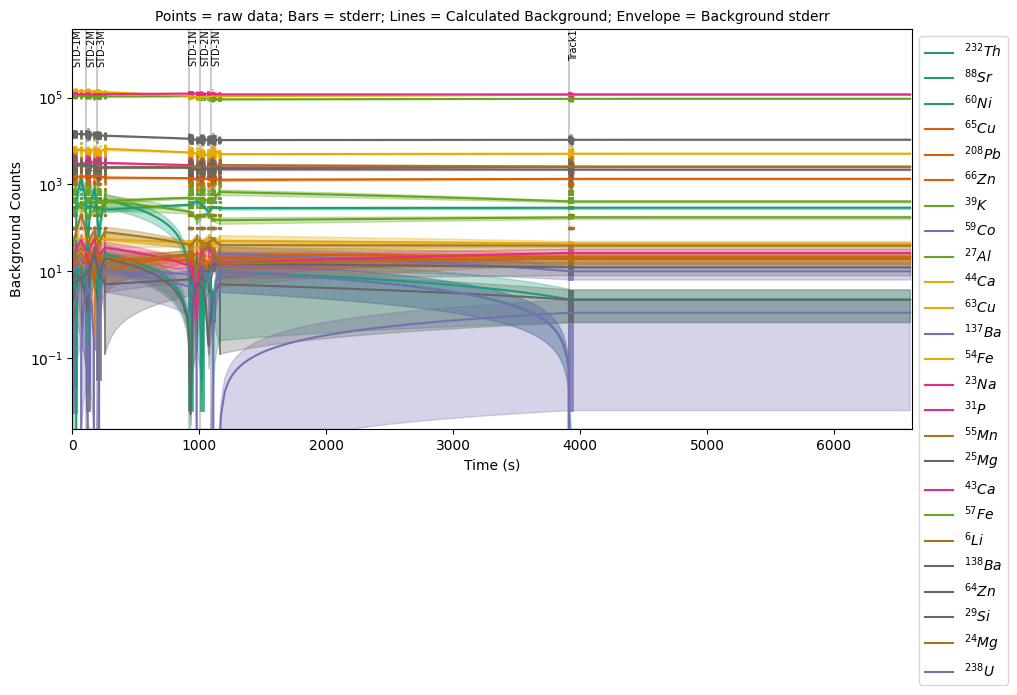

In [ ]:
#dat.get_background()
dat.bkg_calc_interp1d() # Order of the polynomial is 0
dat.bkg_plot()

Background Subtraction:   0%|          | 0/7 [00:00<?, ?it/s]

Drawing Plots:   0%|          | 0/7 [00:00<?, ?it/s]

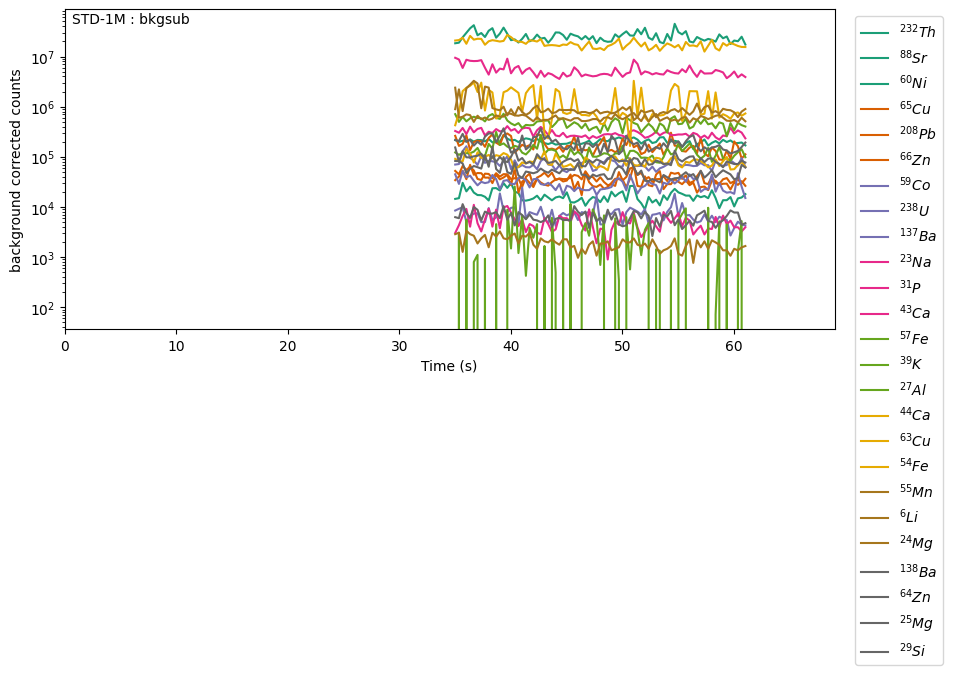

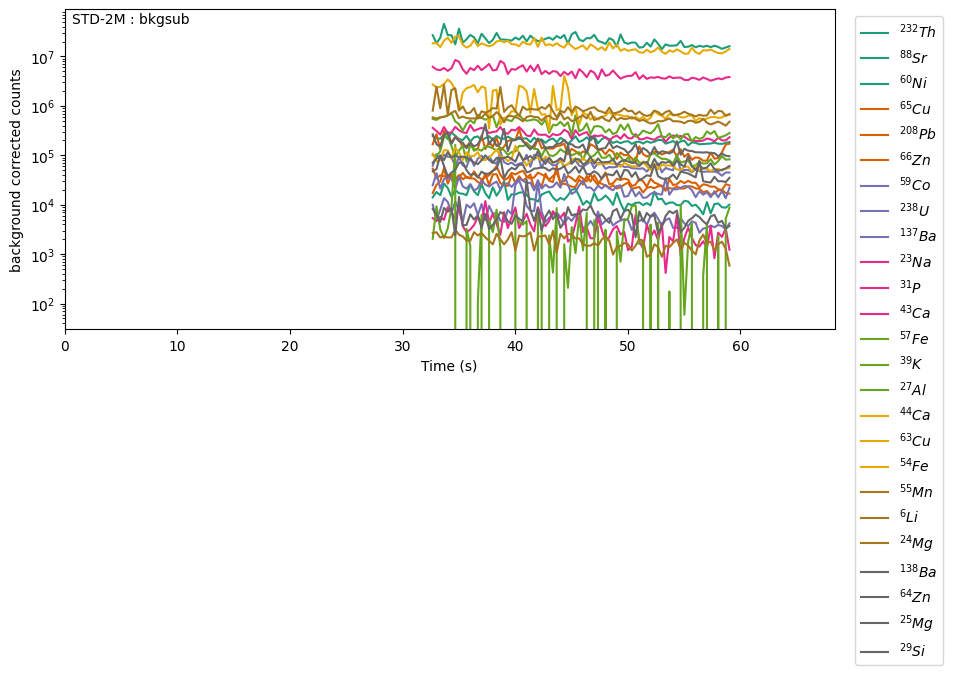

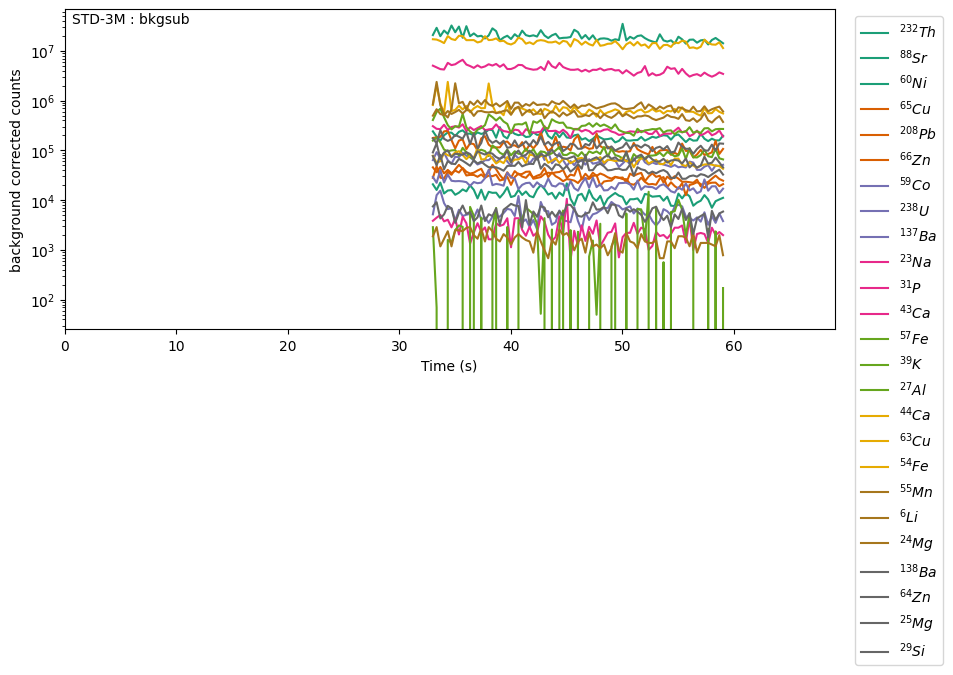

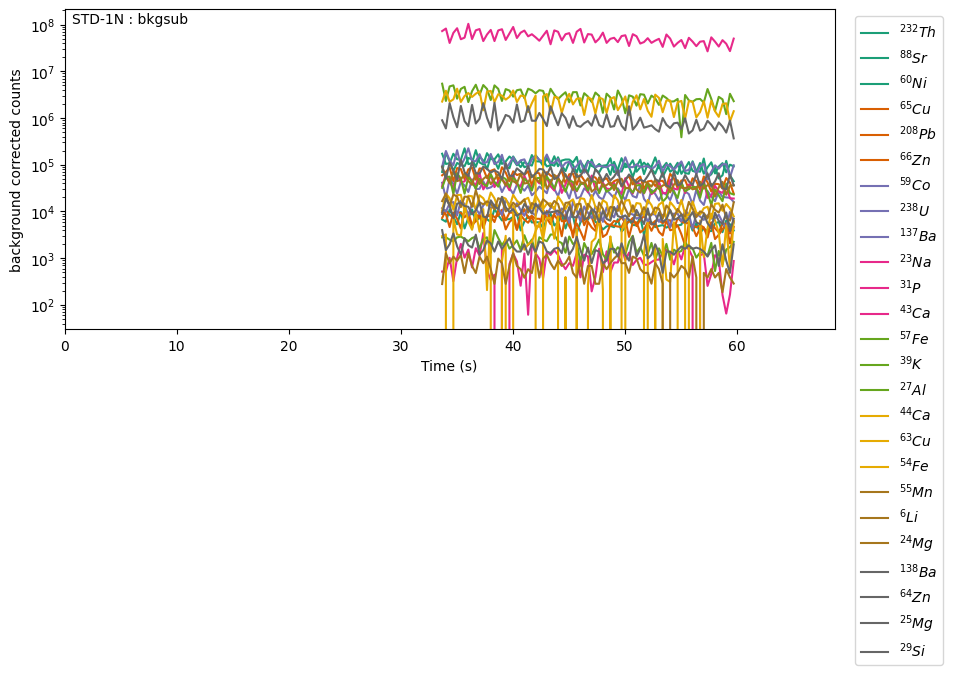

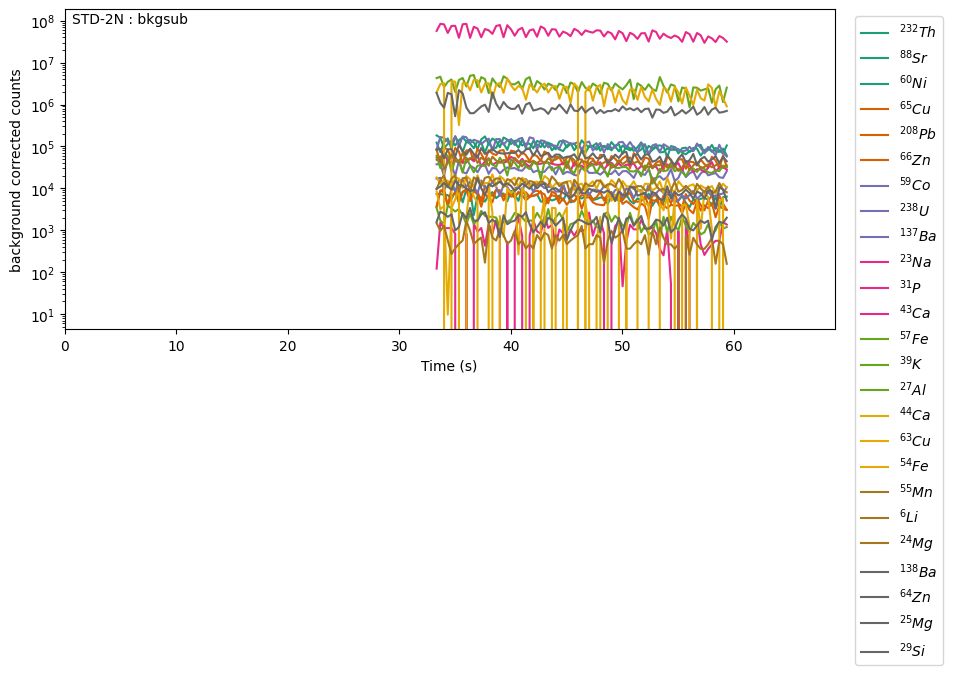

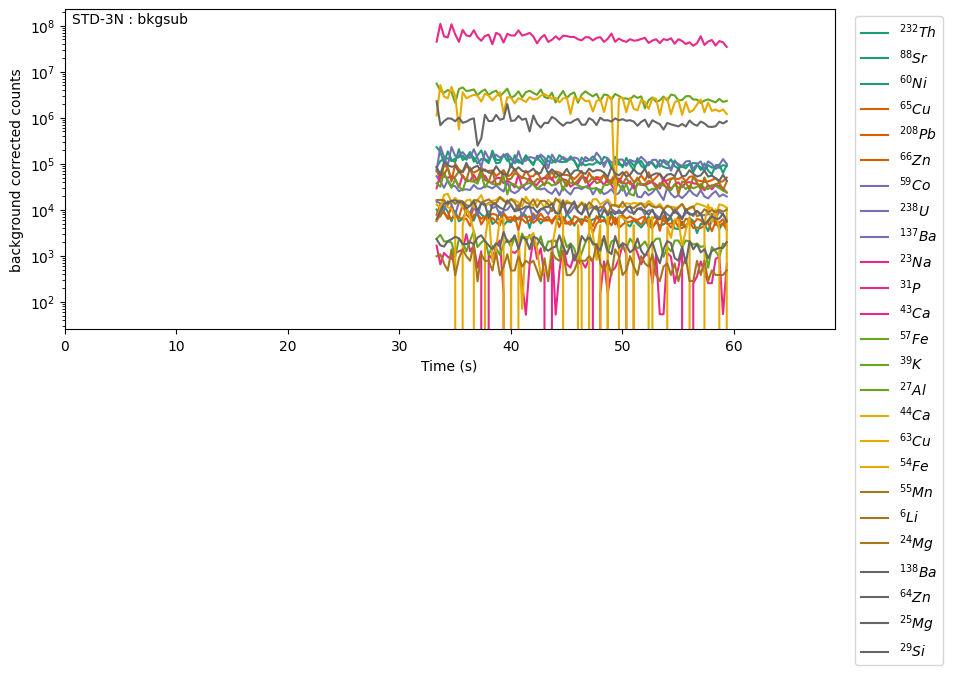

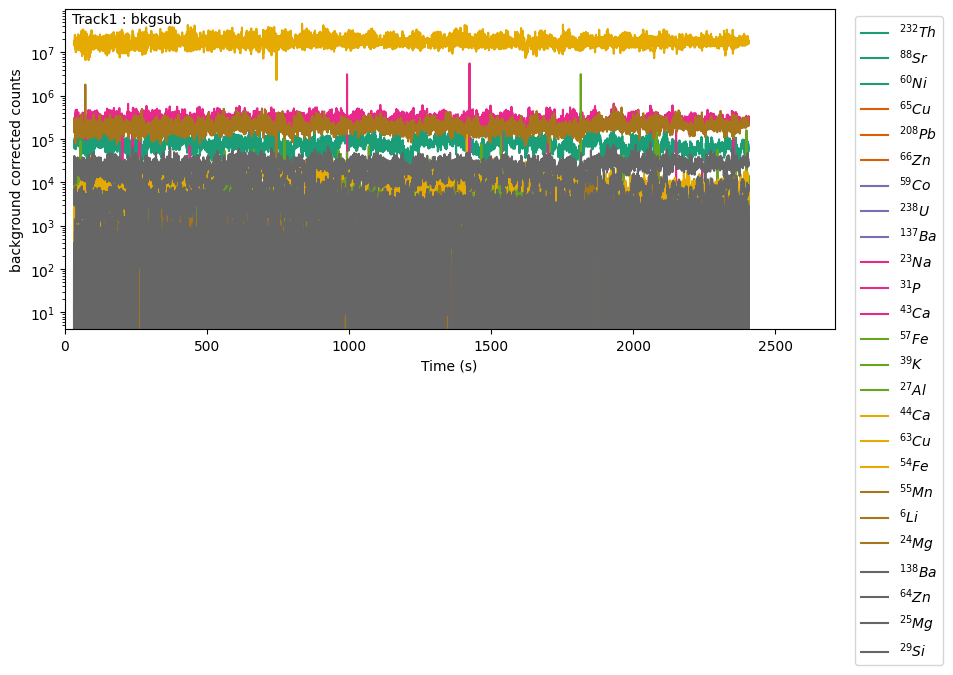

In [ ]:
dat.bkg_subtract()
dat.trace_plots()

Ratio Calculation:   0%|          | 0/7 [00:00<?, ?it/s]

Drawing Plots:   0%|          | 0/7 [00:00<?, ?it/s]

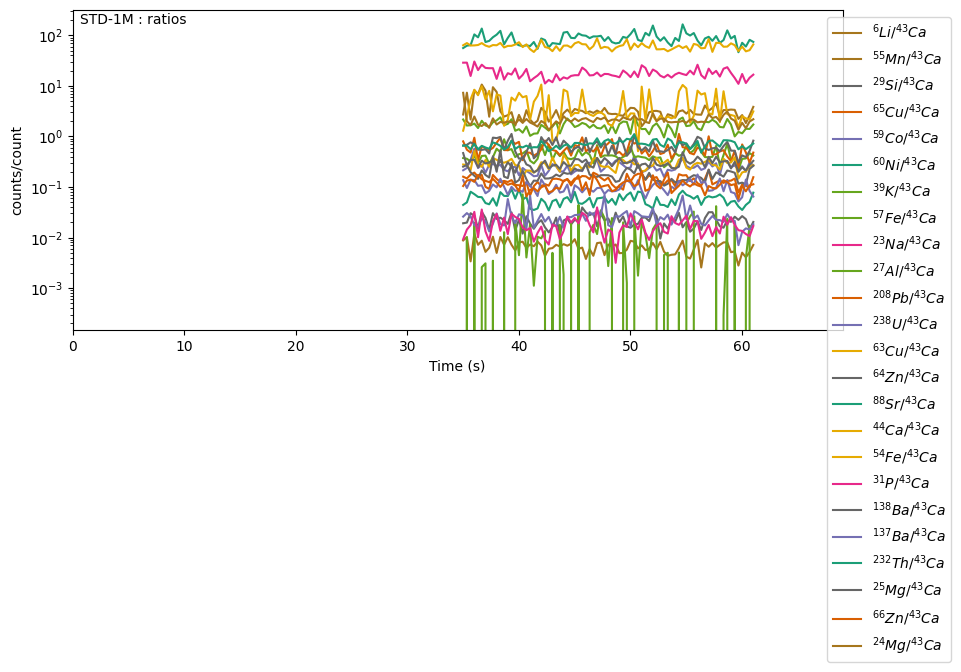

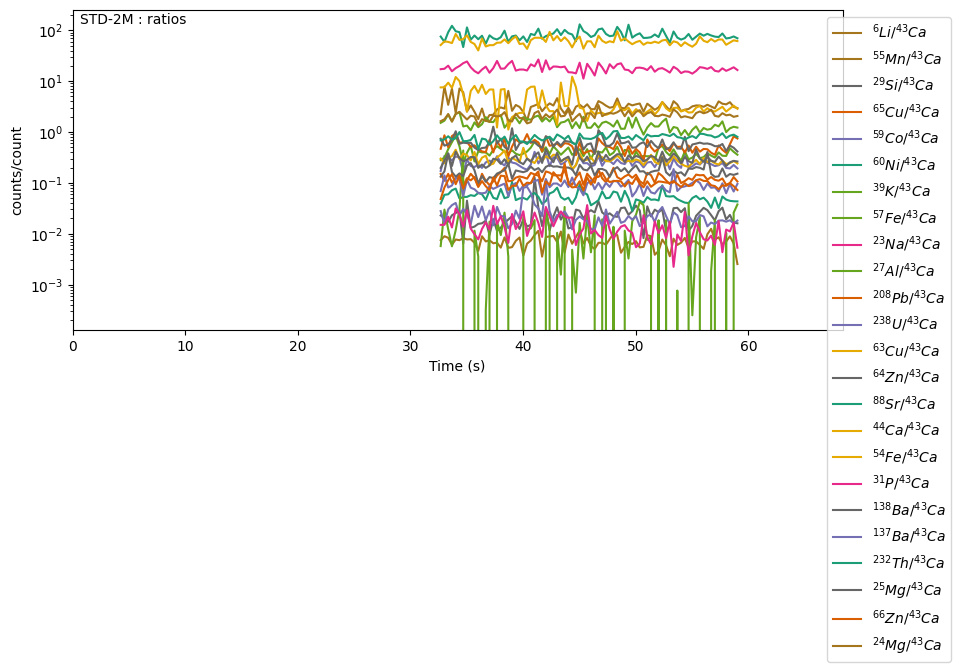

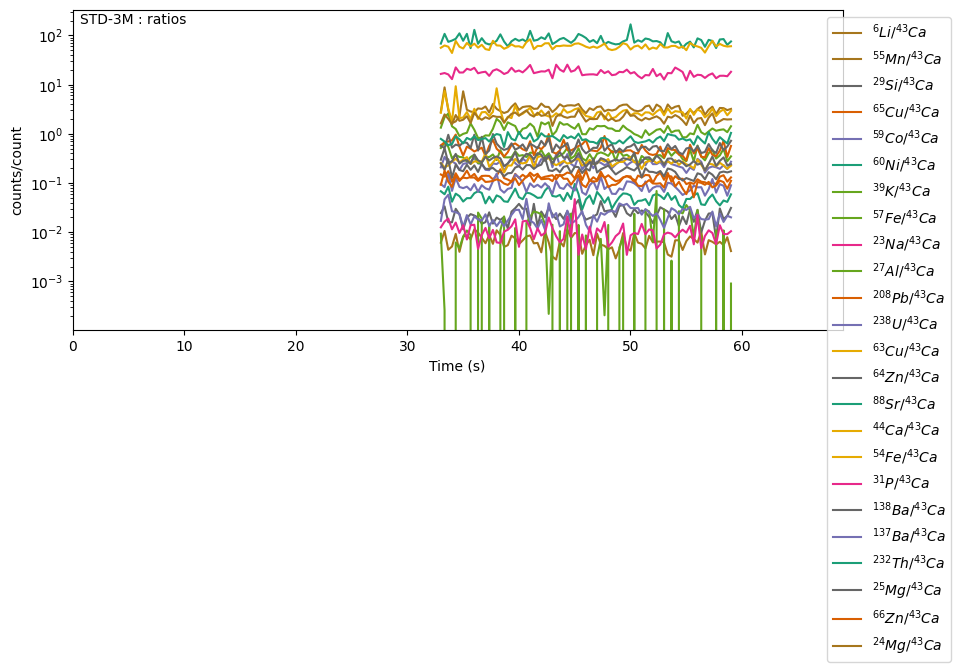

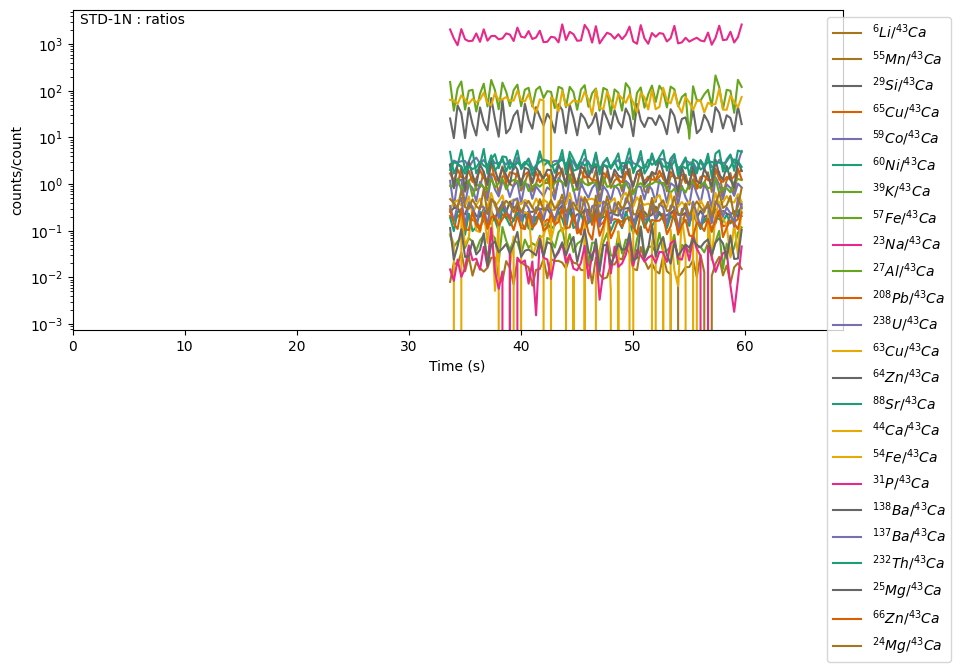

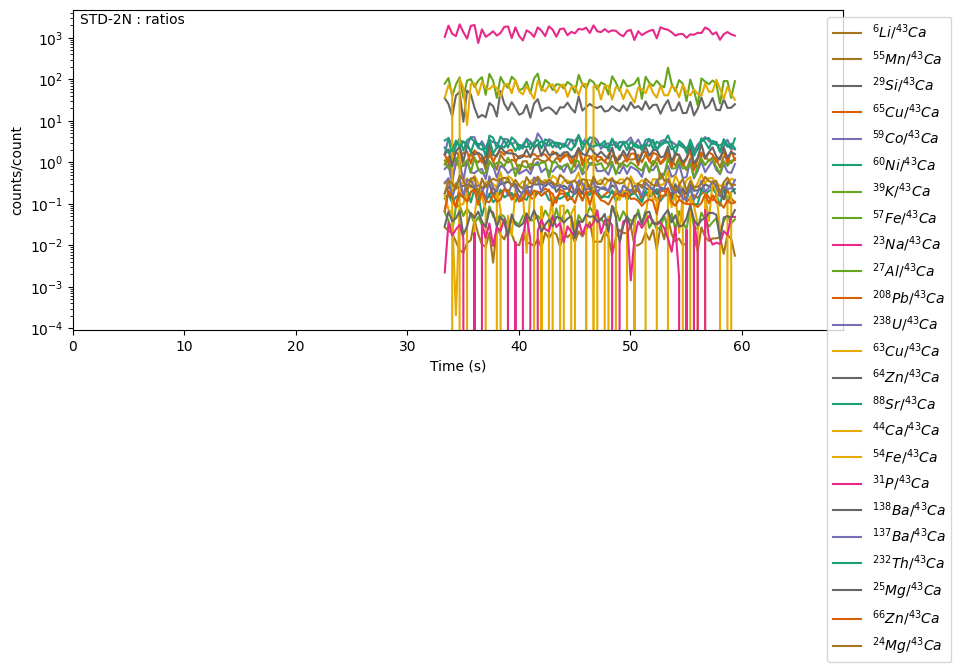

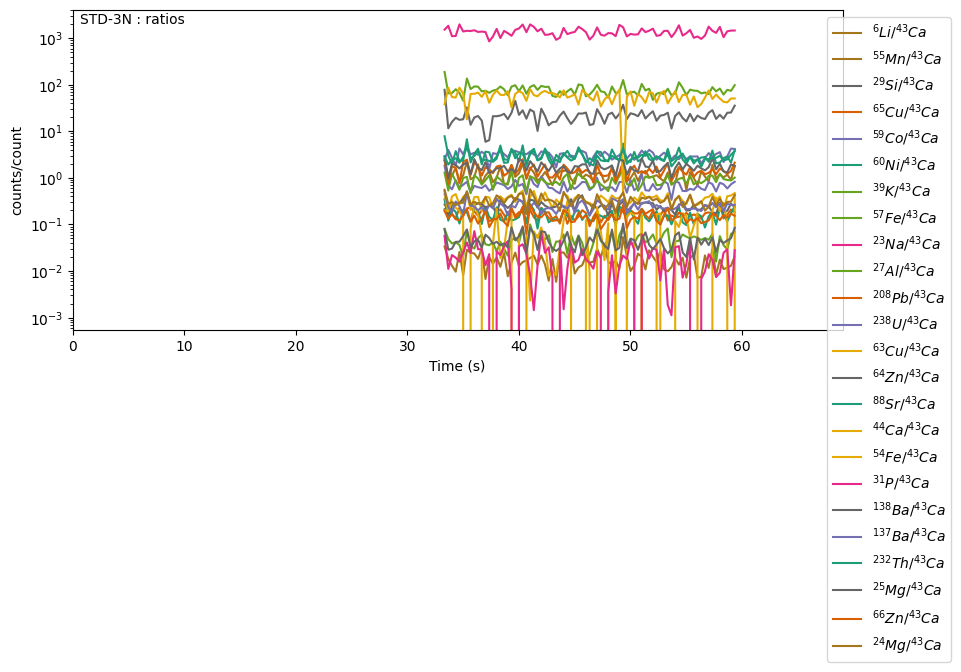

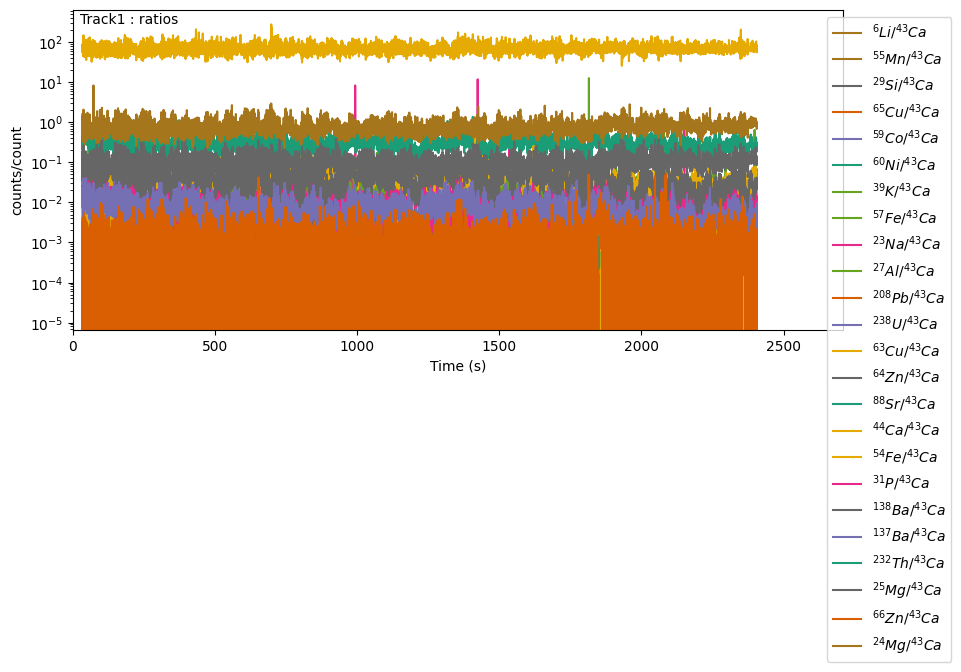

In [ ]:
dat.ratio()
dat.trace_plots()

Applying Calibrations:   0%|          | 0/7 [00:00<?, ?it/s]

(<Figure size 1410x2700 with 49 Axes>,
 [(<Axes: title={'left': 'All SRMs'}, xlabel='counts/counts', ylabel='mol/mol'>,
   <Axes: >),
  (<Axes: xlabel='counts/counts', ylabel='mol/mol'>, <Axes: >),
  (<Axes: xlabel='counts/counts', ylabel='mol/mol'>, <Axes: >),
  (<Axes: xlabel='counts/counts', ylabel='mol/mol'>, <Axes: >),
  (<Axes: xlabel='counts/counts', ylabel='mol/mol'>, <Axes: >),
  (<Axes: xlabel='counts/counts', ylabel='mol/mol'>, <Axes: >),
  (<Axes: xlabel='counts/counts', ylabel='mol/mol'>, <Axes: >),
  (<Axes: xlabel='counts/counts', ylabel='mol/mol'>, <Axes: >),
  (<Axes: xlabel='counts/counts', ylabel='mol/mol'>, <Axes: >),
  (<Axes: xlabel='counts/counts', ylabel='mol/mol'>, <Axes: >),
  (<Axes: xlabel='counts/counts', ylabel='mol/mol'>, <Axes: >),
  (<Axes: xlabel='counts/counts', ylabel='mol/mol'>, <Axes: >),
  (<Axes: xlabel='counts/counts', ylabel='mol/mol'>, <Axes: >),
  (<Axes: xlabel='counts/counts', ylabel='mol/mol'>, <Axes: >),
  (<Axes: xlabel='counts/counts', 

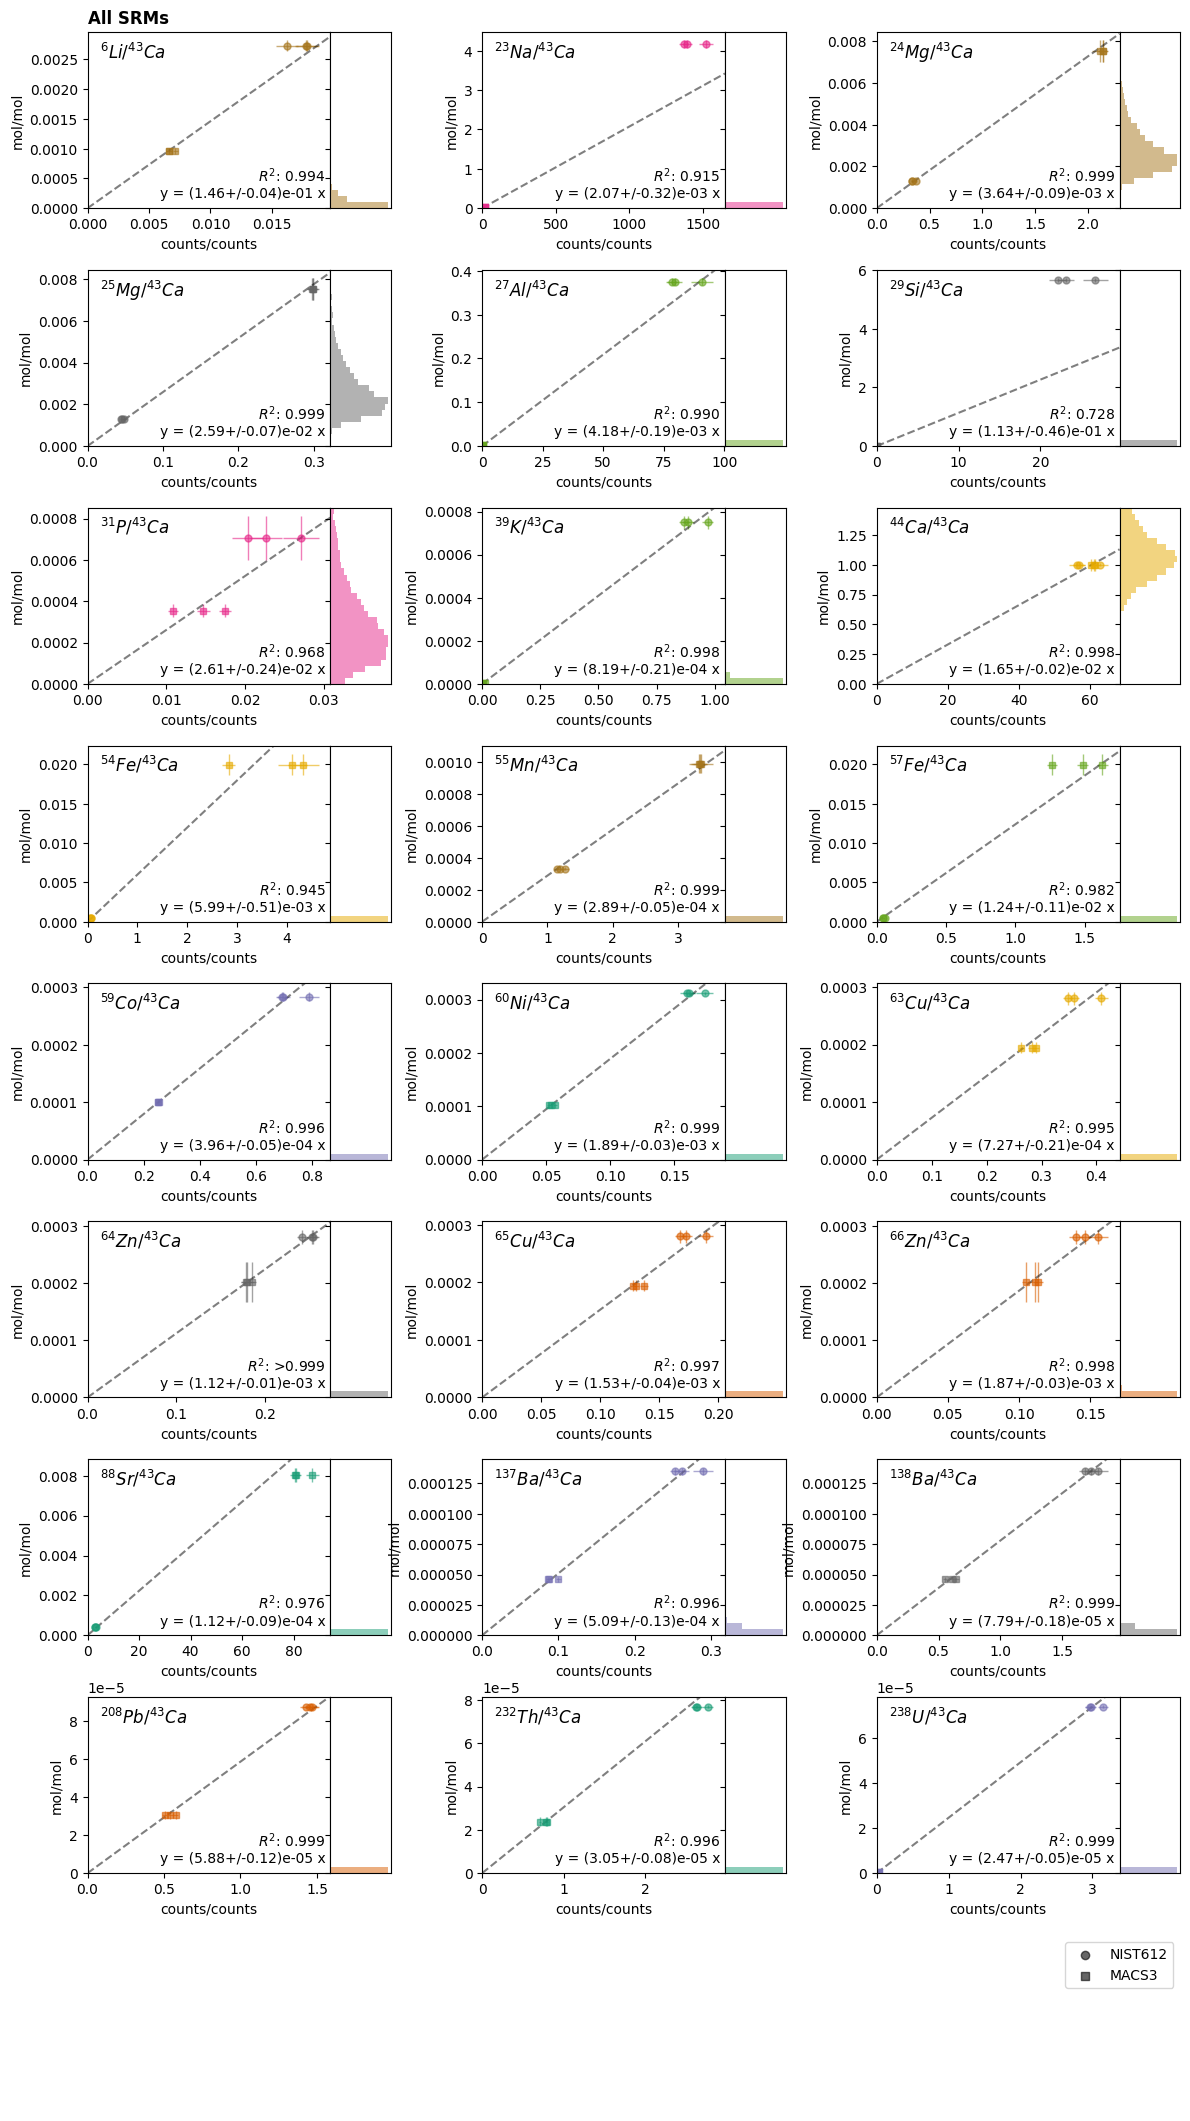

In [ ]:
dat.calibrate(srms_used=['NIST612','MACS3'], drift_correct=True,zero_intercept=True) #'JCtNP1','MACS3','SPLTNP1', 'NIST612' drift_correct=True, ,zero_intercept=True)
dat.calibration_plot()

In [ ]:
# Exports plots

dat.export_traces()

# New Section